In [1]:
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans

/home/hhs/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hhs/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hhs/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hhs/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: 

In [2]:
X, labels = make_circles(n_samples = 500, noise=0.1, factor = .2)

In [3]:
def multiscatter2(np_l,la_l):

    #labels = ['base', 'partial', 'stair', 'init_edit']

    #data = {la_l[0]:aa, 'partial':bb, 'stair': cc, 'init_edit': dd}
    data = {}
    len_d = len(np_l)
    for j in range(len_d):
        data.update({la_l[j]:np_l[j]})

    fig, ax = plt.subplots(1,1,figsize=(5,5))

    colors_o = ['blue', 'orange','red', 'green']
    colors = colors_o[:len_d]
    
    labels = la_l
    markers_o = ['o', 'x', 's', '^']
    markers = markers_o[:len_d]
    sizes_o = [20,40,60, 10]
    sizes = sizes_o[:len_d]
    widths_o = [0.5, 2,1, 3]
    widths = widths_o[:len_d]

    for i, label in enumerate(labels):
        X = data[label][:,0]
        Y = data[label][:,1]
        ax.scatter(X,Y, marker = markers[i], color = colors[i],label=label,
                       s=sizes[i], edgecolor='k', linewidth=widths[i]) 
        pass
    ax.set_xlabel('x_val')
    ax.set_ylabel('y_val')

    ax.legend(loc = 'best')
    plt.tight_layout()
    #plt.savefig(os.path.join(Constant.main_dir, 'chart_1.png'))
    plt.show()

In [4]:
lenx = len(X)
sim = np.zeros([lenx, lenx])
sig = 0.2
for i in range(lenx):
    for j in range(lenx):
        v1 = X[i]
        v2 = X[j]
        dist2 = sum((v1-v2)**2)
        gauss = np.exp(-dist2/sig)
        sim[i,j]=gauss

In [7]:
sim2 = np.zeros([lenx,lenx])
cut_thres = 0.8
for i in range(lenx):
    for j in range(lenx):
        if sim[i,j]>cut_thres:
            sim2[i,j]=1

In [8]:
simsum2 = sim2.sum(axis=1)
D2 = np.diag(simsum2)
L2 = D2-sim2

In [9]:
vals, vecs = np.linalg.eig(L2)

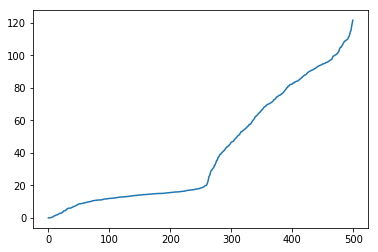

In [10]:
plt.plot(sorted(vals))

In [12]:
sorted(vals)[:10]

[-3.797647203770895e-15,
 5.191507166460599e-14,
 0.046768180304620564,
 0.06924620642994618,
 0.18872126926437957,
 0.2684687251531276,
 0.4933956223027286,
 0.540806953910918,
 0.8357776007857873,
 1.113585768905448]

In [13]:
sort_ind = np.argsort(vals)

In [14]:
sort_ind[:10]

array([ 25,  26,  27,   3,  64,  95,  94,  82,  93, 103])

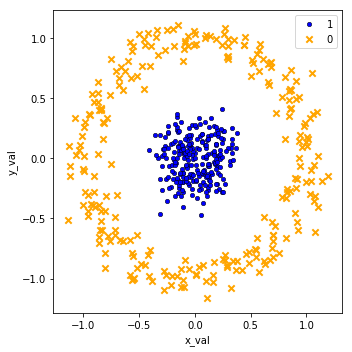

In [18]:
fv = vecs[:,25]
clusters = fv>0

cl1 = clusters ==True
cl2 = clusters ==False

class1 = X[cl1,:]
class2 = X[cl2,:]

nps = [class1, class2]
labs = ['1', '0']
multiscatter2(nps,labs)